# The Link Between the Western Hemisphere Warm Pool Index and Heat Waves in the Great Plains Region of the US

In [1]:
#import libraries and modules
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import warnings

/home/istempko/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


## Warm Pool Data

In [2]:
#from https://psl.noaa.gov/data/climateindices/list/
file_path = '/home/istempko/clim680/whwp.data.txt'
df = pd.read_csv(file_path, sep=' ', skipinitialspace=True, header=None, index_col=0, na_values=-99.99)
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,-0.17,-0.18,0.26,-0.03,-0.46,-0.20,-1.60,-2.42,-1.81,-2.02,-1.78,-0.28
1949,-0.13,-0.13,-0.29,0.53,-0.66,-0.60,-1.04,-2.09,-0.81,-1.77,-1.03,-0.32
1950,-0.17,-0.30,-0.96,-1.93,-2.27,-2.23,-2.12,-2.62,-0.52,-2.14,-0.82,-0.32
1951,-0.17,-0.30,-0.93,-0.70,-0.93,-0.56,-0.07,2.23,1.50,1.55,1.09,0.01
1952,-0.07,-0.26,-0.31,0.35,0.24,0.85,-0.16,2.42,2.44,1.73,1.05,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.33,0.56,1.30,2.63,2.88,4.38,5.98,5.79,3.53,4.49,2.34,0.15
2021,-0.17,-0.30,-0.54,-0.39,0.26,0.55,1.64,3.83,4.73,4.35,2.30,0.33
2022,0.16,0.03,-0.13,-0.04,0.20,1.32,1.89,4.12,4.31,4.74,1.71,-0.01


- WHWPa Area anomaly scaled by 10e6 km**2 Monthly anomaly of the ocean surface area Ocean region >28.5C in the Atlantic and eastern North Pacific.
- Climatology is 1951-2000. Wang, C., and D.B. Enfield, 2001 : The tropical Western Hemisphere warm pool, Geophys. Res. Lett., 28, 1635-1638. 

In [4]:
#renaming columns and axis
df.columns = ['Jan', 'Feb', 'Mar', 'Apri', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = df.rename_axis('Year')
df

,Jan,Feb,Mar,Apri,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1948,-0.17,-0.18,0.26,-0.03,-0.46,-0.20,-1.60,-2.42,-1.81,-2.02,-1.78,-0.28
1949,-0.13,-0.13,-0.29,0.53,-0.66,-0.60,-1.04,-2.09,-0.81,-1.77,-1.03,-0.32
1950,-0.17,-0.30,-0.96,-1.93,-2.27,-2.23,-2.12,-2.62,-0.52,-2.14,-0.82,-0.32
1951,-0.17,-0.30,-0.93,-0.70,-0.93,-0.56,-0.07,2.23,1.50,1.55,1.09,0.01
1952,-0.07,-0.26,-0.31,0.35,0.24,0.85,-0.16,2.42,2.44,1.73,1.05,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.33,0.56,1.30,2.63,2.88,4.38,5.98,5.79,3.53,4.49,2.34,0.15
2021,-0.17,-0.30,-0.54,-0.39,0.26,0.55,1.64,3.83,4.73,4.35,2.30,0.33
2022,0.16,0.03,-0.13,-0.04,0.20,1.32,1.89,4.12,4.31,4.74,1.71,-0.01


In [8]:
#adding the yearly means to the dataframe to have a WHWP index corresponding to each year
df['Mean'] = df.mean(axis=1)
df

,Jan,Feb,Mar,Apri,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mean
Year,,,,,,,,,,,,,
1948,-0.17,-0.18,0.26,-0.03,-0.46,-0.20,-1.60,-2.42,-1.81,-2.02,-1.78,-0.28,-0.890833
1949,-0.13,-0.13,-0.29,0.53,-0.66,-0.60,-1.04,-2.09,-0.81,-1.77,-1.03,-0.32,-0.695000
1950,-0.17,-0.30,-0.96,-1.93,-2.27,-2.23,-2.12,-2.62,-0.52,-2.14,-0.82,-0.32,-1.366667
1951,-0.17,-0.30,-0.93,-0.70,-0.93,-0.56,-0.07,2.23,1.50,1.55,1.09,0.01,0.226667
1952,-0.07,-0.26,-0.31,0.35,0.24,0.85,-0.16,2.42,2.44,1.73,1.05,-0.05,0.685833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.33,0.56,1.30,2.63,2.88,4.38,5.98,5.79,3.53,4.49,2.34,0.15,2.863333
2021,-0.17,-0.30,-0.54,-0.39,0.26,0.55,1.64,3.83,4.73,4.35,2.30,0.33,1.382500
2022,0.16,0.03,-0.13,-0.04,0.20,1.32,1.89,4.12,4.31,4.74,1.71,-0.01,1.525000


Text(0, 0.5, 'WHWP Index')

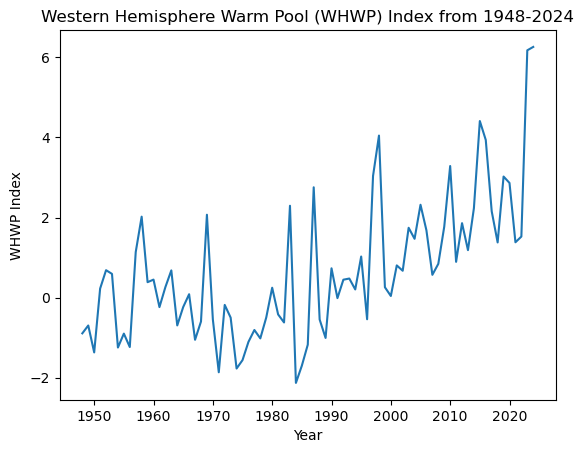

In [9]:
#plotting the WHWP index over time (year, index) 
plt.plot(df['Mean'])
plt.title('Western Hemisphere Warm Pool (WHWP) Index from 1948-2024')
plt.xlabel('Year')
plt.ylabel('WHWP Index')

In [6]:
#creating a function that transforms a series into a DataArray
def series_to_da(series: pd.Series) -> xr.DataArray:
    return xr.DataArray.from_series(series) 

In [7]:
#transforming dataframe df['Mean'] into a DataArray
da_mean = series_to_da(df['Mean'])
da_mean

<xarray.DataArray 'Mean' (Year: 77)> Size: 616B
array([-0.89083333, -0.695     , -1.36666667,  0.22666667,  0.68583333,
        0.59333333, -1.245     , -0.8975    , -1.2325    ,  1.1375    ,
        2.02166667,  0.38666667,  0.45083333, -0.23583333,  0.26333333,
        0.68083333, -0.69333333, -0.235     ,  0.08583333, -1.05166667,
       -0.59666667,  2.07      , -0.5425    , -1.8625    , -0.18083333,
       -0.49833333, -1.76916667, -1.55916667, -1.10416667, -0.80666667,
       -1.01666667, -0.495     ,  0.24833333, -0.41833333, -0.61916667,
        2.29416667, -2.12833333, -1.69833333, -1.17333333,  2.755     ,
       -0.54583333, -1.00583333,  0.7325    , -0.01166667,  0.44833333,
        0.4775    ,  0.205     ,  1.02666667, -0.53916667,  3.03833333,
        4.04583333,  0.26      ,  0.04166667,  0.805     ,  0.67166667,
        1.74416667,  1.46916667,  2.31916667,  1.67916667,  0.57      ,
        0.84416667,  1.77083333,  3.28583333,  0.89416667,  1.86      ,
        1.18583333,  2.2325    ,  4.40916667,  3.93666667,  2.15666667,
        1.37833333,  3.02333333,  2.86333333,  1.3825    ,  1.525     ,
        6.17416667,  6.25875   ])
Coordinates:
  * Year     (Year) int64 616B 1948 1949 1950 1951 1952 ... 2021 2022 2023 2024

## Defining WHWP Positive, Negative, and Neutral

In [10]:
#finding the mean WHWP index from 1948-2024
da_mean.mean()

<xarray.DataArray 'Mean' ()> Size: 8B
np.float64(0.6688365800865801)

In [11]:
#using the mean WHWP index from 1948-2024 to define WHWP Positive, Negative, Neutral years
whwp_pos = da_mean.where(da_mean>=0.67)
whwp_neg = da_mean.where(da_mean<=-0.67)
whwp_neu = da_mean.where((da_mean>-0.67) & (df['Mean']<0.67))

Text(0, 0.5, 'WHWP Index')

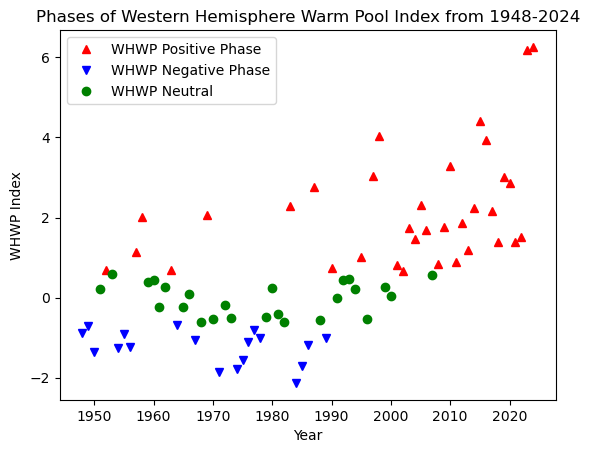

In [12]:
#plot phases of the WHWP from 1948-2024
plt.plot(da_mean['Year'], whwp_pos, 'r^', linestyle='none', label='WHWP Positive Phase')
plt.plot(da_mean['Year'], whwp_neg, 'bv', linestyle='none', label='WHWP Negative Phase')
plt.plot(da_mean['Year'], whwp_neu, 'go', linestyle='none', label='WHWP Neutral') ;

plt.legend()
plt.title('Phases of Western Hemisphere Warm Pool Index from 1948-2024')
plt.xlabel('Year')
plt.ylabel('WHWP Index')

#### How many years do we have with WHWP Positive, Neutral, and Negative?

In [13]:
#count the number of years we have for each WHWP phase
print('WHWP Positive: ', whwp_pos.count(dim='Year').values)
print('WHWP Neutral: ', whwp_neu.count(dim='Year').values)
print('WHWP Negative: ', whwp_neg.count(dim='Year').values)

counts=[whwp_pos.count(dim='Year').values,
        whwp_neu.count(dim='Year').values,
        whwp_neg.count(dim='Year').values]
print(counts)

WHWP Positive:  34
WHWP Neutral:  25
WHWP Negative:  18
[array(34), array(25), array(18)]


Text(0, 0.5, 'WHWP Index')

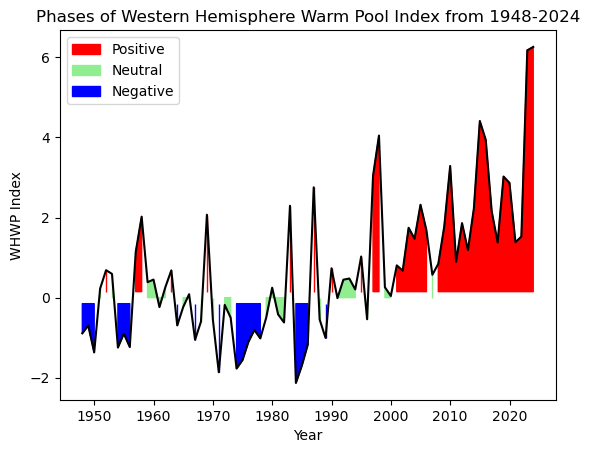

In [14]:
#plot phases of the WHWP index from 1948-2024
plt.plot(da_mean['Year'], da_mean, 'k')
plt.fill_between(da_mean['Year'].values, whwp_pos, y2=0.15, color='red', label='Positive')
plt.fill_between(da_mean['Year'].values, whwp_neu, color='lightgreen', label='Neutral')
plt.fill_between(da_mean['Year'].values, whwp_neg, y2=-0.15, color='blue', label='Negative')

plt.legend()
plt.title('Phases of Western Hemisphere Warm Pool Index from 1948-2024')
plt.xlabel('Year')
plt.ylabel('WHWP Index')

## Maximum Temperature Data

In [16]:
model_path = '/home/lortizur/clim680/project_data/'
model_file = 'era5_monthlymax_1985-2014.nc'
#open file
ds_model = xr.open_dataset(model_path + model_file)
ds_model

<xarray.Dataset> Size: 1GB
Dimensions:      (time: 360, lat: 721, lon: 1440)
Coordinates:
    realization  int64 8B ...
  * lat          (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time         (time) datetime64[ns] 3kB 1985-01-31 1985-02-28 ... 2014-12-31
Data variables:
    t2m          (time, lat, lon) float32 1GB ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-09-02T10:15 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

In [17]:
#grouping the monthly maximum temperature data by year
ds_model_yearly = ds_model.groupby('time.year').mean()
ds_model_yearly

<xarray.Dataset> Size: 125MB
Dimensions:      (year: 30, lat: 721, lon: 1440)
Coordinates:
    realization  int64 8B 0
  * lat          (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * year         (year) int64 240B 1985 1986 1987 1988 ... 2011 2012 2013 2014
Data variables:
    t2m          (year, lat, lon) float32 125MB 239.1 239.1 ... 269.3 269.3
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-09-02T10:15 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

In [18]:
#select the years correpsonding to the WHWP data and the coordinates that focus in on the Great Plains Region of the US
#then combine into one data array
da_t2m = ds_model_yearly.t2m.sel(year=slice(da_mean['Year'][37],da_mean['Year'][66]))
da_t2mGP_y = ds_model_yearly.t2m.sel(lat=slice(da_t2m['lat'][460],da_t2m['lat'][572])) 
da_t2mGP_x = ds_model_yearly.t2m.sel(lon=slice(da_t2m['lon'][240],da_t2m['lon'][352]))

da_t2mGP = da_t2m + da_t2mGP_x + da_t2mGP_y

da_t2mGP

<xarray.DataArray 't2m' (year: 30, lat: 113, lon: 113)> Size: 2MB
array([[[882.2639 , 882.18225, 882.2501 , ..., 899.58234, 899.7009 ,
         899.7179 ],
        [881.88354, 881.81067, 881.88293, ..., 899.40173, 899.43286,
         899.551  ],
        [881.631  , 881.59436, 881.5729 , ..., 899.2223 , 899.2583 ,
         899.3845 ],
        ...,
        [850.8921 , 848.50684, 848.4193 , ..., 862.2288 , 862.1726 ,
         862.47205],
        [847.5961 , 847.4053 , 850.2081 , ..., 861.52905, 863.25867,
         861.45764],
        [847.64734, 850.4614 , 850.49365, ..., 858.4975 , 862.0622 ,
         858.9574 ]],

       [[882.7058 , 882.57983, 882.44055, ..., 899.71643, 899.8515 ,
         899.81836],
        [882.2488 , 882.1107 , 881.98883, ..., 899.58014, 899.6837 ,
         899.7116 ],
        [881.89075, 881.8025 , 881.57996, ..., 899.4889 , 899.60974,
         899.6089 ],
...
        [854.7894 , 853.0145 , 853.44824, ..., 866.927  , 867.14777,
         867.0533 ],
        [851.699  , 850.93396, 854.20996, ..., 865.6278 , 867.3446 ,
         865.7042 ],
        [852.00146, 854.1749 , 854.4282 , ..., 862.6304 , 866.1235 ,
         862.6144 ]],

       [[886.7837 , 886.8872 , 887.0736 , ..., 900.12964, 900.19653,
         900.2749 ],
        [886.5768 , 886.6355 , 886.8408 , ..., 899.87714, 899.9094 ,
         900.1233 ],
        [886.4076 , 886.4812 , 886.6074 , ..., 899.68567, 899.7805 ,
         899.9581 ],
        ...,
        [854.84454, 852.8879 , 852.984  , ..., 865.2537 , 865.09924,
         864.702  ],
        [851.5781 , 850.8302 , 853.50464, ..., 863.9978 , 865.1413 ,
         862.65173],
        [851.77893, 853.71716, 854.1306 , ..., 861.23486, 863.7864 ,
         859.9995 ]]], dtype=float32)
Coordinates:
  * lat          (lat) float64 904B 25.0 25.25 25.5 25.75 ... 52.5 52.75 53.0
  * lon          (lon) float64 904B -120.0 -119.8 -119.5 ... -92.5 -92.25 -92.0
  * year         (year) int64 240B 1985 1986 1987 1988 ... 2011 2012 2013 2014
    realization  int64 8B 0

### Calculate Maximum Temperature Anomalies

In [22]:
da_climo = da_t2mGP.mean()
da_anoms = da_t2mGP-da_climo
da_anoms

<xarray.DataArray 't2m' (year: 30, lat: 113, lon: 113)> Size: 2MB
array([[[-10.645264 , -10.726929 , -10.659058 , ...,   6.6731567,
           6.791748 ,   6.808716 ],
        [-11.025635 , -11.098511 , -11.026245 , ...,   6.4925537,
           6.5236816,   6.6418457],
        [-11.278198 , -11.314819 , -11.336304 , ...,   6.3131104,
           6.349121 ,   6.475342 ],
        ...,
        [-42.01709  , -44.402344 , -44.48987  , ..., -30.680359 ,
         -30.736572 , -30.437134 ],
        [-45.31305  , -45.503906 , -42.70105  , ..., -31.380127 ,
         -29.650513 , -31.451538 ],
        [-45.26184  , -42.447754 , -42.415527 , ..., -34.411682 ,
         -30.846985 , -33.951782 ]],

       [[-10.203369 , -10.329346 , -10.468628 , ...,   6.807251 ,
           6.942322 ,   6.9091797],
        [-10.6604   , -10.798462 , -10.920349 , ...,   6.6709595,
           6.774536 ,   6.802429 ],
        [-11.018433 , -11.106689 , -11.329224 , ...,   6.579712 ,
           6.7005615,   6.699707 ],
...
        [-38.11975  , -39.894653 , -39.460938 , ..., -25.982178 ,
         -25.761414 , -25.855896 ],
        [-41.210205 , -41.97522  , -38.69922  , ..., -27.281372 ,
         -25.564575 , -27.204956 ],
        [-40.907715 , -38.734253 , -38.480957 , ..., -30.278809 ,
         -26.785706 , -30.2948   ]],

       [[ -6.1254883,  -6.0219727,  -5.8355713, ...,   7.220459 ,
           7.2873535,   7.3657227],
        [ -6.3323975,  -6.2736816,  -6.0683594, ...,   6.9679565,
           7.000244 ,   7.2141113],
        [ -6.501587 ,  -6.4279785,  -6.301758 , ...,   6.7764893,
           6.871338 ,   7.04895  ],
        ...,
        [-38.064636 , -40.0213   , -39.92517  , ..., -27.655457 ,
         -27.809937 , -28.207153 ],
        [-41.331055 , -42.07898  , -39.40454  , ..., -28.911377 ,
         -27.767883 , -30.257446 ],
        [-41.13025  , -39.192017 , -38.778564 , ..., -31.674316 ,
         -29.122803 , -32.909668 ]]], dtype=float32)
Coordinates:
  * lat          (lat) float64 904B 25.0 25.25 25.5 25.75 ... 52.5 52.75 53.0
  * lon          (lon) float64 904B -120.0 -119.8 -119.5 ... -92.5 -92.25 -92.0
  * year         (year) int64 240B 1985 1986 1987 1988 ... 2011 2012 2013 2014
    realization  int64 8B 0

## Combine Data

In [20]:
#need to get matching time series for the phases of WHWP index
whwp_pos2 = whwp_pos.sel(Year=slice(whwp_pos['Year'][37],whwp_pos['Year'][66]))
whwp_neu2 = whwp_neu.sel(Year=slice(whwp_neu['Year'][37],whwp_neu['Year'][66]))
whwp_neg2 = whwp_neg.sel(Year=slice(whwp_neg['Year'][37],whwp_neg['Year'][66]))

In [29]:
#selecting the maximum temperature anomalies corresonding to the phases of the WHWP index, and taking the mean by year
whwp_pos_t2m = da_anoms.sel(year=whwp_pos2.dropna(dim='Year')['Year']).mean(dim='Year')
whwp_neu_t2m = da_anoms.sel(year=whwp_neu2.dropna(dim='Year')['Year']).mean(dim='Year')
whwp_neg_t2m = da_anoms.sel(year=whwp_neg2.dropna(dim='Year')['Year']).mean(dim='Year')

comp_t2m = [whwp_pos_t2m, whwp_neu_t2m, whwp_neg_t2m]

## Composite Maps

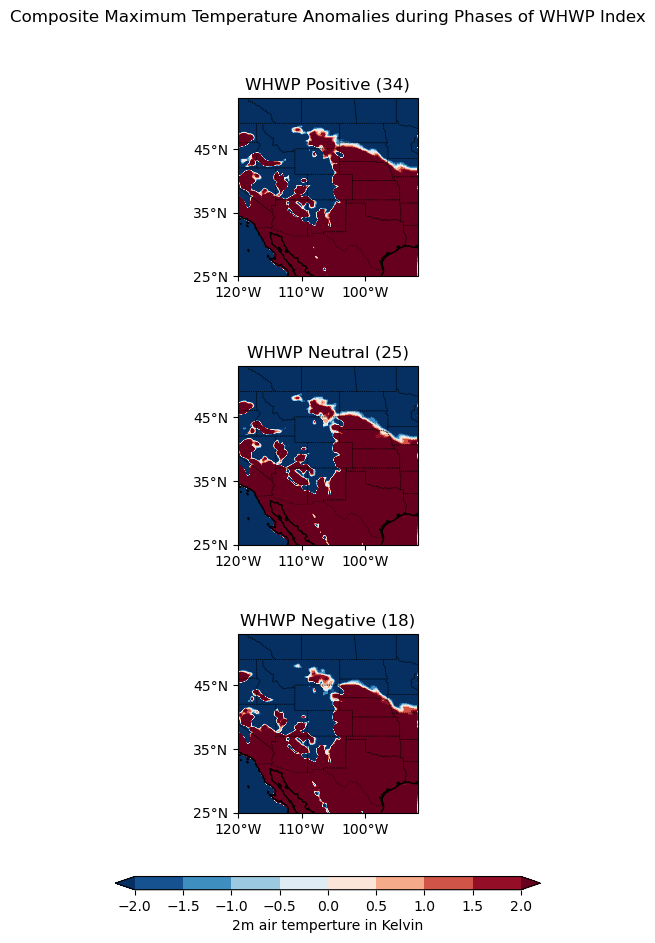

In [25]:
labels=['WHWP Positive','WHWP Neutral', 'WHWP Negative']
clevs = np.arange(-2.0,2.1,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,whwp in enumerate(comp_t2m):

        # Select the season
        data = comp_t2m[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_t2m[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_t2m[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='RdBu_r',
                          extend='both')

      # Longitude labels
       # could also turn this into a function so you do not have to do this everytime
        axs[i].set_xticks(np.arange(-120,-92,10), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        # Latitude labels
        axs[i].set_yticks(np.arange(25,53,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
      
    
# adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='2m air temperture in Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Temperature Anomalies during Phases of WHWP Index') ;

### Significance Testing

In [26]:
#find the difference between maximum temperature anomalies with positive WHWP phases with WHWP, etc.
diff_t2m = [whwp_pos_t2m-whwp_neu_t2m, whwp_neg_t2m-whwp_neu_t2m]

Text(0.5, 0.98, 'Composite Maximum Temperature Differences during WHWP Positive and Negative Year')

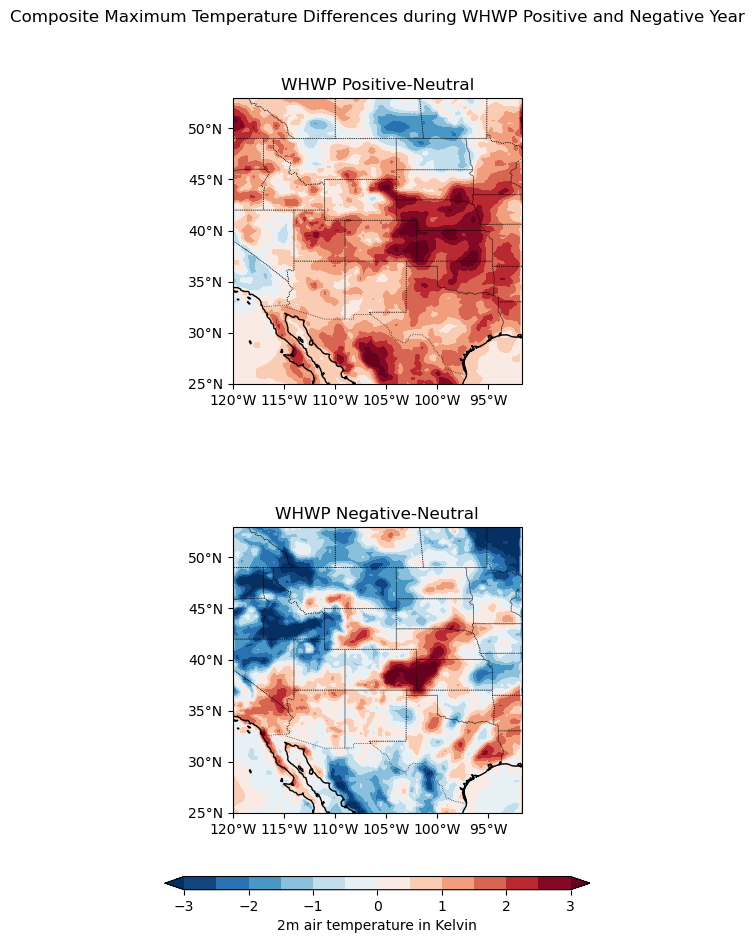

In [27]:
labels=['WHWP Positive-Neutral','WHWP Negative-Neutral']
clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,whwp in enumerate(diff_t2m):

        # Select the season
        data = diff_t2m[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=diff_t2m[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons,diff_t2m[i]['lat'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='RdBu_r',extend='both')
        
       # Longitude labels
        axs[i].set_xticks(np.arange(-120,-92,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(25,53,5), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='2m air temperature in Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Temperature Differences during WHWP Positive and Negative Year')

In [28]:
p = 0.05 # 95% confidence level, or 5% likelihood that the result arose by chance

In [31]:
#maximum temperature anomaly values during WHWP index phases
whwp_pos_t2m_vals = da_anoms.sel(year=whwp_pos2.dropna(dim='Year')['Year'])
whwp_neu_t2m_vals = da_anoms.sel(year=whwp_neu2.dropna(dim='Year')['Year'])
whwp_neg_t2m_vals = da_anoms.sel(year=whwp_neg2.dropna(dim='Year')['Year'])

In [32]:
tstat,pval = ttest_ind(whwp_pos_t2m_vals, 
                       whwp_neu_t2m_vals,
                       equal_var = False)

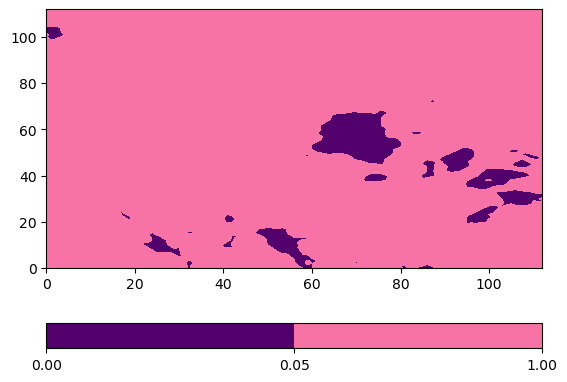

In [33]:
plt.contourf(pval,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

In [34]:
#get mask
mask_diff = diff_t2m[0].where(pval <= p)
mask_diff

<xarray.DataArray 't2m' (lat: 113, lon: 113)> Size: 51kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat          (lat) float64 904B 25.0 25.25 25.5 25.75 ... 52.5 52.75 53.0
  * lon          (lon) float64 904B -120.0 -119.8 -119.5 ... -92.5 -92.25 -92.0
    realization  int64 8B 0

Text(0.5, 0.98, 'Composite Maximum Temperature Difference for WHWP Positive-Neutral')

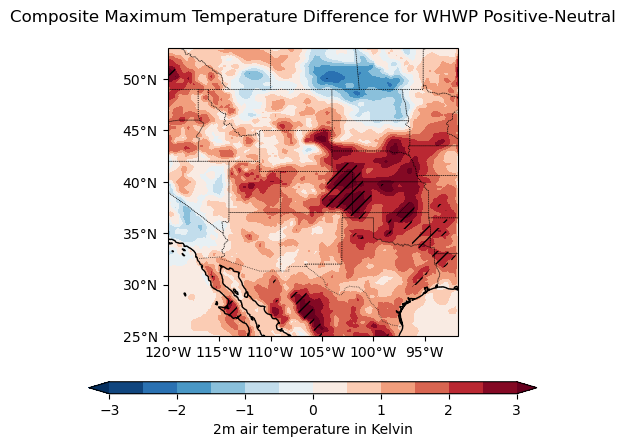

In [36]:
labels=['WHWP Positive vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_t2m[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_t2m[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_t2m[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_t2m[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='RdBu_r',extend='both')

# Longitude labels
axs.set_xticks(np.arange(-120,-92,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Latitude labels
axs.set_yticks(np.arange(25,53,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

# Overlay of stippling
ss=axs.contourf(lons,diff_t2m[0]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['///',''],extend='both',alpha=0.0)

# Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='2m air temperature in Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Temperature Difference for WHWP Positive-Neutral')

#plt.savefig('stats_ttest.png')

In [37]:
tstat2,pval2 = ttest_ind(whwp_neg_t2m_vals, 
                       whwp_neu_t2m_vals,
                       equal_var = False)

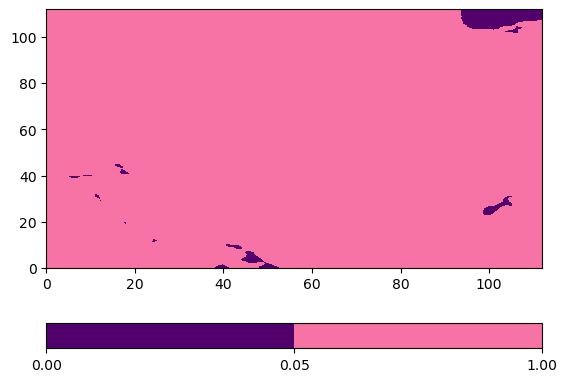

In [38]:
plt.contourf(pval2,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

In [39]:
#get mask
mask_diff2 = diff_t2m[1].where(pval2 <= p)
mask_diff2

<xarray.DataArray 't2m' (lat: 113, lon: 113)> Size: 51kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., -5.2099686, -5.357788 ,
        -5.302971 ],
       [       nan,        nan,        nan, ..., -5.322197 , -5.3093605,
        -5.4219303],
       [       nan,        nan,        nan, ..., -5.0335293, -5.026909 ,
        -5.0274734]], dtype=float32)
Coordinates:
  * lat          (lat) float64 904B 25.0 25.25 25.5 25.75 ... 52.5 52.75 53.0
  * lon          (lon) float64 904B -120.0 -119.8 -119.5 ... -92.5 -92.25 -92.0
    realization  int64 8B 0

Text(0.5, 0.98, 'Composite Maximum Temperature Difference for WHWP Negative-Neutral')

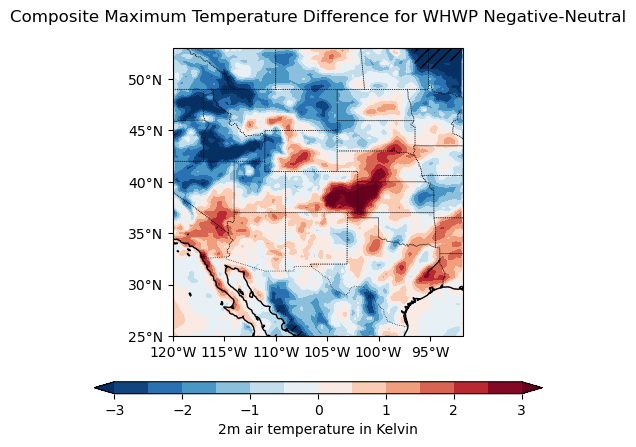

In [40]:
labels=['WHWP Negative vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_t2m[1]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_t2m[1]['lon'])
mask_data,lons=add_cyclic_point(mask_diff2,coord=diff_t2m[1]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_t2m[1]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='RdBu_r',extend='both')

# Longitude labels
axs.set_xticks(np.arange(-120,-92,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Latitude labels
axs.set_yticks(np.arange(25,53,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

# Overlay of stippling
ss=axs.contourf(lons,diff_t2m[1]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['///',''],extend='both',alpha=0.0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])
axs.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='2m air temperature in Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Temperature Difference for WHWP Negative-Neutral')

#plt.savefig('stats_ttest2.png')

## Correlation Map

### Pick a point from Max Temperature Anomalies

In [41]:
pt=da_anoms.sel(lat=38,lon=-103,method='nearest')
pt

<xarray.DataArray 't2m' (year: 30)> Size: 120B
array([13.581909, 14.61731 , 14.501831, 15.237183, 20.99823 , 16.145203,
       11.523926, 13.630371,  8.505737, 12.269653, 15.151001, 15.672485,
       10.553589, 15.446045, 13.934387, 15.499268, 13.35376 , 16.115112,
       16.537231, 15.689941, 18.465332, 19.88086 , 13.687927, 18.883423,
       16.178955, 16.857788, 18.574951, 20.543396, 19.361816, 15.700684],
      dtype=float32)
Coordinates:
    lat          float64 8B 38.0
    lon          float64 8B -103.0
  * year         (year) int64 240B 1985 1986 1987 1988 ... 2011 2012 2013 2014
    realization  int64 8B 0

### Line Graph

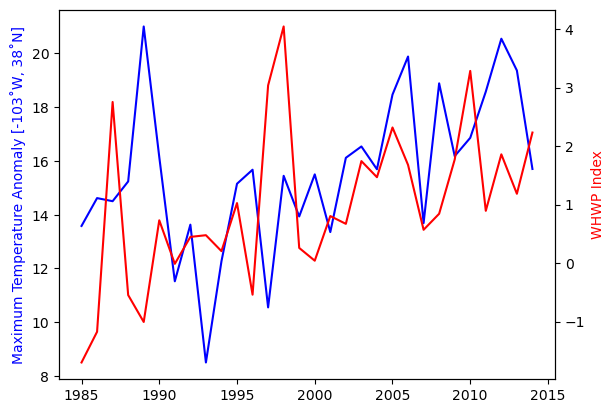

In [42]:
da_mean_85_14 = da_mean.sel(Year=slice(da_mean['Year'][37],da_mean['Year'][66]))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(pt['year'],pt,'b')
ax2.plot(da_mean_85_14['Year'],da_mean_85_14,'r')
 
# be sure to include units for ax1.label and add a title for this plot
ax1.set_ylabel('Maximum Temperature Anomaly [-103˚W, 38˚N]', color='b')
ax2.set_ylabel('WHWP Index', color='r') ;

### Correlation Calculation

In [43]:
R = np.corrcoef(da_mean_85_14,pt)
R

array([[1.        , 0.11802871],
       [0.11802871, 1.        ]])

In [44]:
corr = R[0,1]
corr

np.float64(0.1180287141541704)

### Correlation over a Domain

In [45]:
r_map = xr.corr(da_mean_85_14, da_anoms,dim='year')
r_map

<xarray.DataArray (Year: 30, lat: 113, lon: 113)> Size: 3MB
array([[[ 3.22274504e-08, -1.60250372e-07, -6.36696184e-08, ...,
          2.82243846e-07, -1.38360142e-07,  1.85644688e-07],
        [-6.37736698e-08,  6.34737468e-08,  6.25808417e-08, ...,
         -2.79792674e-07, -2.82092470e-07,  2.28530091e-07],
        [ 1.26898063e-07, -3.14086468e-08,  1.86671013e-07, ...,
          1.38837488e-07, -1.39306421e-07, -9.26481493e-08],
        ...,
        [ 1.17900740e-06, -6.52015756e-07, -7.28972330e-07, ...,
         -1.33052484e-07,  1.31723524e-07,  3.25009020e-08],
        [-4.91269828e-07,  2.89304738e-07, -5.79939599e-07, ...,
          3.34682942e-08, -3.26985122e-08, -1.31255517e-07],
        [-3.91858143e-07, -8.74407646e-07,  9.81617555e-08, ...,
         -3.44943127e-08, -1.97265968e-07,  3.44974007e-08]],

       [[ 3.22274504e-08, -1.60250372e-07, -6.36696184e-08, ...,
          2.82243846e-07, -1.38360142e-07,  1.85644688e-07],
        [-6.37736698e-08,  6.34737468e-08,  6.25808417e-08, ...,
         -2.79792674e-07, -2.82092470e-07,  2.28530091e-07],
        [ 1.26898063e-07, -3.14086468e-08,  1.86671013e-07, ...,
          1.38837488e-07, -1.39306421e-07, -9.26481493e-08],
...
        [ 1.17900740e-06, -6.52015756e-07, -7.28972330e-07, ...,
         -1.33052484e-07,  1.31723524e-07,  3.25009020e-08],
        [-4.91269828e-07,  2.89304738e-07, -5.79939599e-07, ...,
          3.34682942e-08, -3.26985122e-08, -1.31255517e-07],
        [-3.91858143e-07, -8.74407646e-07,  9.81617555e-08, ...,
         -3.44943127e-08, -1.97265968e-07,  3.44974007e-08]],

       [[ 3.22274504e-08, -1.60250372e-07, -6.36696184e-08, ...,
          2.82243846e-07, -1.38360142e-07,  1.85644688e-07],
        [-6.37736698e-08,  6.34737468e-08,  6.25808417e-08, ...,
         -2.79792674e-07, -2.82092470e-07,  2.28530091e-07],
        [ 1.26898063e-07, -3.14086468e-08,  1.86671013e-07, ...,
          1.38837488e-07, -1.39306421e-07, -9.26481493e-08],
        ...,
        [ 1.17900740e-06, -6.52015756e-07, -7.28972330e-07, ...,
         -1.33052484e-07,  1.31723524e-07,  3.25009020e-08],
        [-4.91269828e-07,  2.89304738e-07, -5.79939599e-07, ...,
          3.34682942e-08, -3.26985122e-08, -1.31255517e-07],
        [-3.91858143e-07, -8.74407646e-07,  9.81617555e-08, ...,
         -3.44943127e-08, -1.97265968e-07,  3.44974007e-08]]])
Coordinates:
  * Year         (Year) int64 240B 1985 1986 1987 1988 ... 2011 2012 2013 2014
  * lat          (lat) float64 904B 25.0 25.25 25.5 25.75 ... 52.5 52.75 53.0
  * lon          (lon) float64 904B -120.0 -119.8 -119.5 ... -92.5 -92.25 -92.0
    realization  int64 8B 0

In [46]:
#take mean in order to get the 2 dimensions required for the map
r_map2 = r_map.mean(dim='Year')
r_map2

<xarray.DataArray (lat: 113, lon: 113)> Size: 102kB
array([[ 5.96804637e-09, -2.96759948e-08, -1.17906701e-08, ...,
         5.22673788e-08, -2.56222485e-08,  3.43786459e-08],
       [-1.18099389e-08,  1.17543976e-08,  1.15890448e-08, ...,
        -5.18134581e-08, -5.22393463e-08,  4.23203872e-08],
       [ 2.34996413e-08, -5.81641607e-09,  3.45687061e-08, ...,
         2.57106459e-08, -2.57974854e-08, -1.71570647e-08],
       ...,
       [ 2.18334705e-07, -1.20743659e-07, -1.34994876e-07, ...,
        -2.46393490e-08,  2.43932451e-08,  6.01868555e-09],
       [-9.09758941e-08,  5.35749515e-08, -1.07396222e-07, ...,
         6.19783226e-09, -6.05528003e-09, -2.43065773e-08],
       [-7.25663228e-08, -1.61927342e-07,  1.81781029e-08, ...,
        -6.38783569e-09, -3.65307348e-08,  6.38840753e-09]])
Coordinates:
  * lat          (lat) float64 904B 25.0 25.25 25.5 25.75 ... 52.5 52.75 53.0
  * lon          (lon) float64 904B -120.0 -119.8 -119.5 ... -92.5 -92.25 -92.0
    realization  int64 8B 0

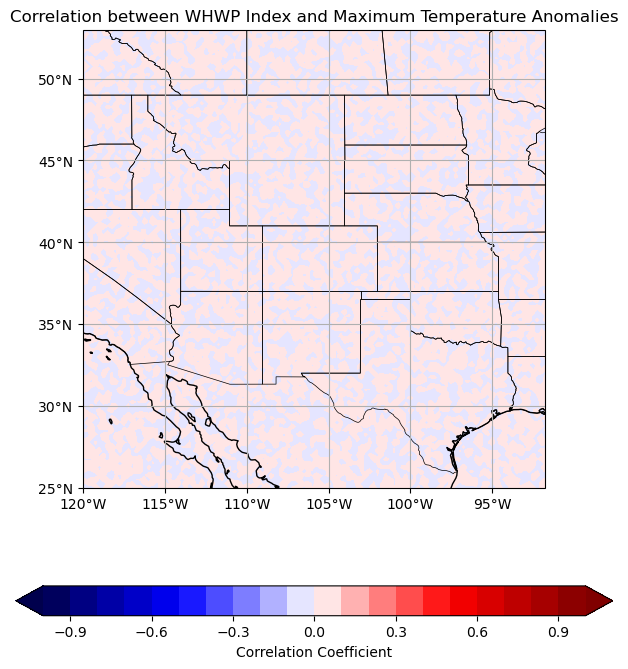

In [47]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=200))

# Add cyclic point
data=r_map2
data,lon=add_cyclic_point(r_map2,coord=da_anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,da_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='seismic',extend='both')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black', linewidth=0.5)

# Add gridlines
ax.gridlines()

#label_latlon(ax,np.arange(-180,181,60),np.arange(-90,91,30))
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-120,-92,5),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(25,53,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between WHWP Index and Maximum Temperature Anomalies') ;